In [20]:
import pandas as pd
import scipy
import numpy
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('final_result.txt', sep='\t')
df.head()

,Population_ID,Animal_ID,Genetic Distance,maxUAR1(B),maxUAR2(B),maxUAR(P),spa
0,1,FR_ALP0194,1.673049,0.117440,0.107431,0.052557,0.00
1,1,FR_ALP0161,1.594048,0.207975,0.171414,0.061215,0.00
2,1,FR_ALP0162,1.579135,0.128921,0.126103,0.062315,0.00
3,1,FR_ALP0163,1.588969,0.153059,0.138807,0.059008,3.12
4,1,FR_ALP0164,1.558419,0.169506,0.142089,0.064594,3.12


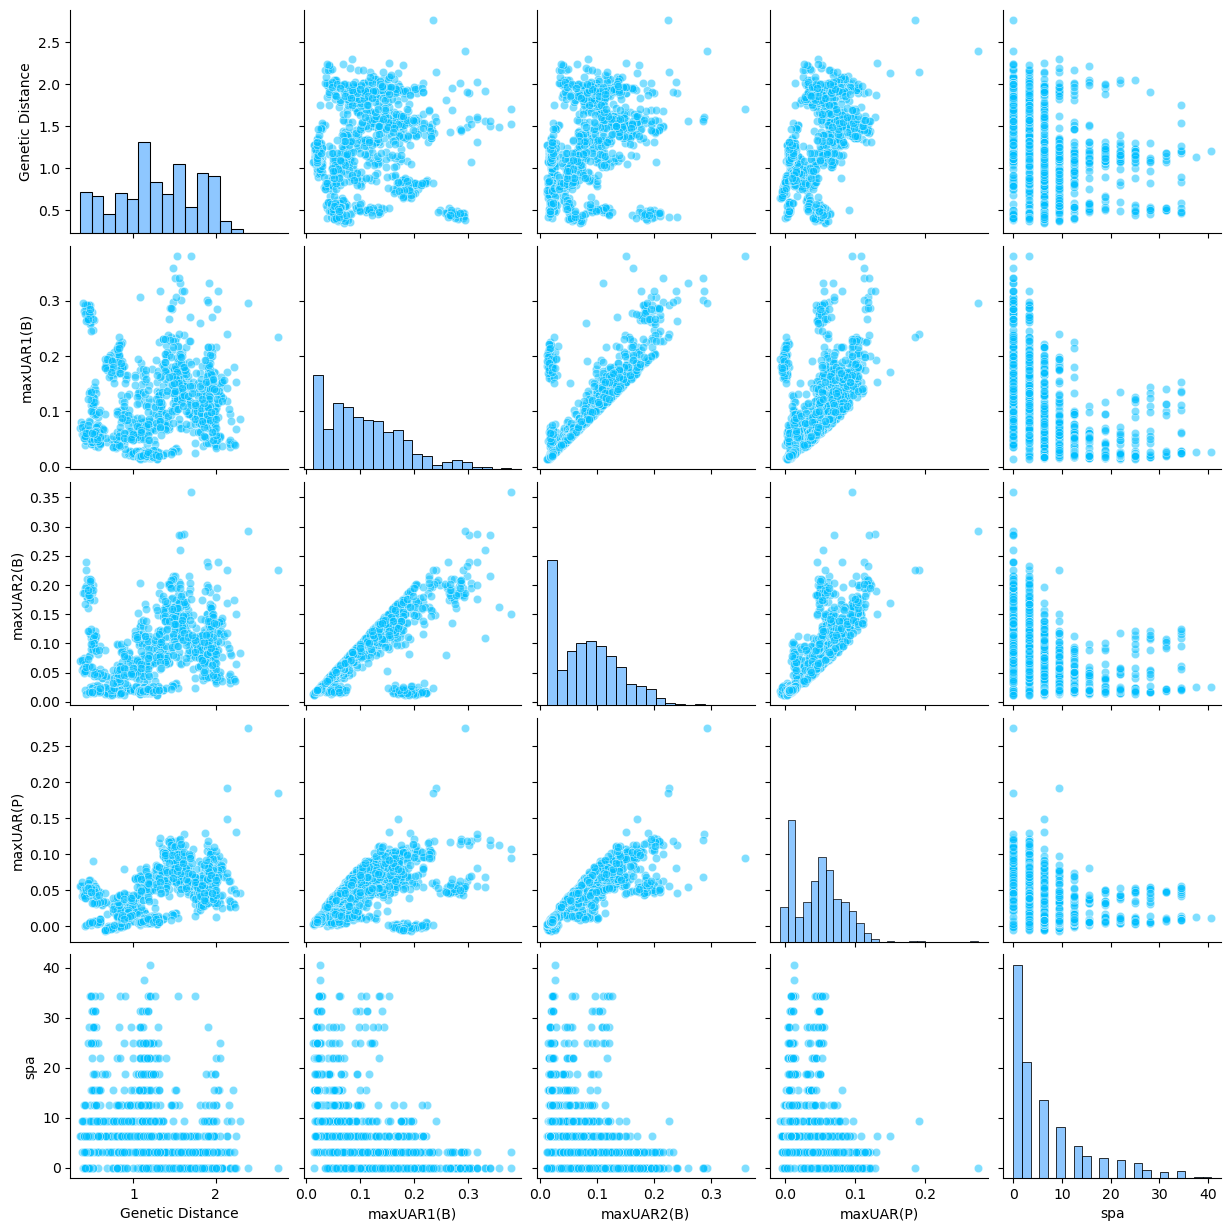

In [6]:
sns.pairplot(df.iloc[:, 2:], plot_kws={'color': 'deepskyblue', 'alpha': 0.5}, diag_kws={'color': 'dodgerblue', 'alpha': 0.5})

There are some tails.
Therefore, apply the log transformation 'x <- log(x + 1)' to the data.

In [16]:
df[df.columns[2:]] = df[df.columns[2:]].apply(lambda x: numpy.log(x + 1))
df.head()

,Population_ID,Animal_ID,Genetic Distance,maxUAR1(B),maxUAR2(B),maxUAR(P),spa
0,1,FR_ALP0194,0.521600,0.100114,0.092730,0.048746,0.000000
1,1,FR_ALP0161,0.512512,0.159621,0.137043,0.056112,0.000000
2,1,FR_ALP0162,0.510739,0.108366,0.106361,0.057036,0.000000
3,1,FR_ALP0163,0.511910,0.124999,0.115292,0.054250,0.632363
4,1,FR_ALP0164,0.508246,0.135814,0.117556,0.058941,0.632363


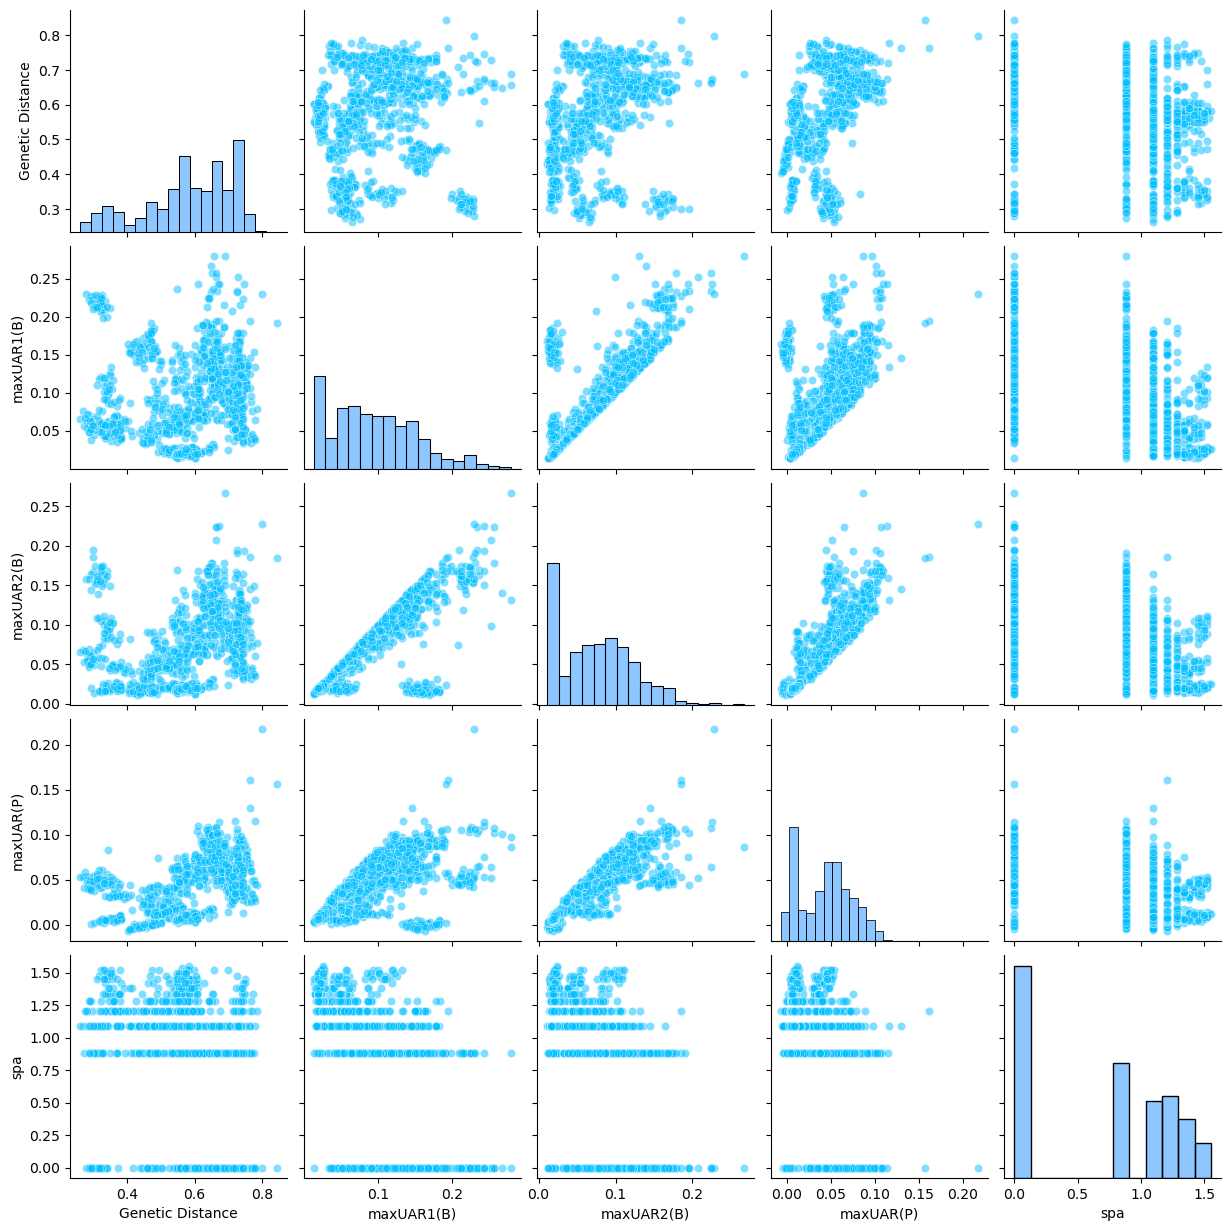

In [15]:
sns.pairplot(df.iloc[:, 2:], plot_kws={'color': 'deepskyblue', 'alpha': 0.5}, diag_kws={'color': 'dodgerblue', 'alpha': 0.5})

In [17]:
data = df.iloc[:, 2:]

def calculate_softmin(data, gamma=1.0):
    softmins = []
    N = data.shape[0]
    dist_matrix = numpy.exp(- scipy.spatial.distance_matrix(data, data) * gamma)
    for i, datapoint in enumerate(numpy.asarray(data)):
        softmin = (- numpy.log((numpy.sum(dist_matrix[i]) - 1) / (N - 1)) / gamma)
        softmins.append(softmin)
    return softmins

def get_anomalous_indices(data, gamma=1.0, n=10):
    return numpy.asarray(pd.Series(calculate_softmin(data, gamma)).sort_values(ascending=False).index)[:n]

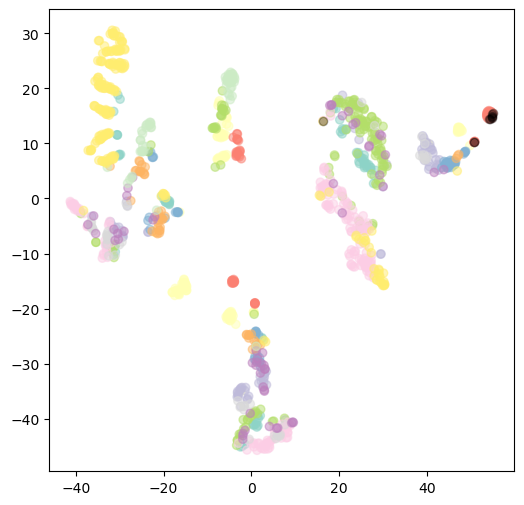

In [38]:
anomalous_indices = get_anomalous_indices(data, gamma=1.0, n=10)

tsne = TSNE()
tsne_representation = tsne.fit_transform(data)

plt.figure(figsize=(6, 6))
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], c=df['Population_ID'], cmap='Set3', alpha=0.5)
plt.scatter(tsne_representation[anomalous_indices, 0], tsne_representation[anomalous_indices, 1], c='black', alpha=0.3)

In [23]:
anomalous_animals = df.iloc[anomalous_indices, :]
display(anomalous_animals)

,Population_ID,Animal_ID,Genetic Distance,maxUAR1(B),maxUAR2(B),maxUAR(P),spa
280,7,CHAgoat162,0.247863,0.207046,0.146775,0.051332,0.0
275,7,TOGgoat451,0.257986,0.205232,0.151870,0.046423,0.0
282,7,CHAgoat163,0.254632,0.200141,0.146258,0.049303,0.0
286,7,CHAgoat167,0.262928,0.190339,0.178062,0.043229,0.0
274,7,TOGgoat450,0.261736,0.201111,0.154202,0.052536,0.0
283,7,CHAgoat164,0.257229,0.197238,0.134504,0.045339,0.0
285,7,CHAgoat166,0.266162,0.193036,0.160485,0.044266,0.0
301,8,CHAgoat206,0.253490,0.047687,0.045371,0.038874,0.0
318,8,CHAgoat194,0.257178,0.050645,0.049012,0.037568,0.0
584,14,IT_BIO0015,0.586775,0.207046,0.205536,0.196600,0.0
